## Challenge Set 3
Topic:        Run a little Regression  
Date:         07/18/2016  
Name:         Adam Levin  
Worked with:  None

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./../../../challenges_data/2013_movies.csv')

In [3]:
data.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


In [4]:
len(data[data.Budget.isnull()])

11

I know I will use Budget as a feature and I know it has 11 nans. I will first impute these values with KNN regression.

In [5]:
mask = data.Budget.isnull().values

In [6]:
X_train = np.hstack((data.values[np.logical_not(mask),:][:,[5]],
                     pd.get_dummies(data.Rating).values[np.logical_not(mask),:]))

In [7]:
X_train = normalize(X_train.astype(float),axis=0)

In [8]:
y_train = data.values[np.logical_not(mask),1]

In [9]:
model = KNeighborsRegressor(n_neighbors=5, weights='distance', leaf_size=30, p=1, n_jobs=1)

In [10]:
model.fit(X_train,y_train);

In [11]:
X_test = np.hstack((data.values[mask,:][:,[5]],
                     pd.get_dummies(data.Rating).values[mask,:]))

In [12]:
data.ix[mask,'Budget'] = model.predict(X_test)

In [13]:
data[mask].head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,1.549988e+08,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,1.650003e+08,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00


**Challenge 1**

In [14]:
feature_cols = [1,4,5]
label_col = [2]

In [15]:
X = data.values[:,feature_cols]
y = data.values[:,label_col]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [17]:
model = LinearRegression(fit_intercept=False)

In [18]:
model.fit(np.ones((X_train.shape[0],1)),y_train);

This model uses the mean of y_train to predict each observation. The MSE of prediction is equal to the variance of y_train.

In [19]:
model.coef_[0][0]

98840143.040000007

In [20]:
np.mean(y_train)

98840143.04

In [21]:
np.mean((model.predict(np.ones((X_train.shape[0],1))) - y_train)**2)

7291100289579225.0

In [22]:
np.var(y_train)

7291100289579225.0

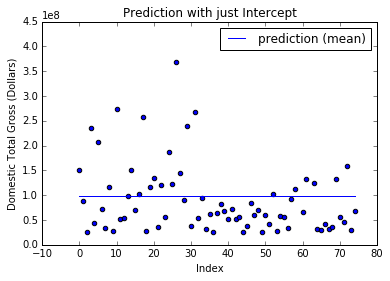

In [23]:
plt.plot(range(len(y_train)),model.predict(np.ones((X_train.shape[0],1))),label='prediction (mean)');
plt.scatter(range(len(y_train)),y_train);
plt.legend()
plt.title('Prediction with just Intercept')
plt.ylabel('Domestic Total Gross (Dollars)');
plt.xlabel('Index');

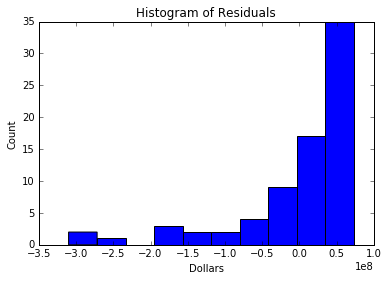

In [24]:
plt.hist(model.predict(np.ones((X_train.shape[0],1)))-y_train);
plt.title('Histogram of Residuals')
plt.ylabel('Count');
plt.xlabel('Dollars');

Model obviously does not fit the data and the residuals are not at all normally distributed.

**Challenge 2**

In [25]:
model.fit(X_train[:,[0]],y_train);

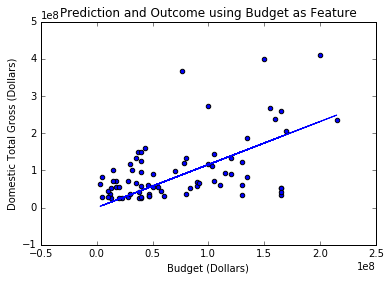

In [26]:
plt.plot(X_train[:,[0]],model.predict(X_train[:,[0]]));
plt.scatter(X_train[:,[0]],y_train);
plt.title('Prediction and Outcome using Budget as Feature')
plt.ylabel('Domestic Total Gross (Dollars)');
plt.xlabel('Budget (Dollars)');

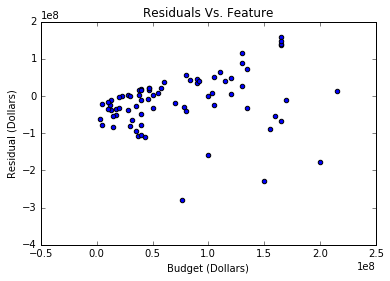

In [27]:
plt.scatter(X_train[:,[0]],model.predict(X_train[:,[0]]) - y_train);
plt.title('Residuals Vs. Feature')
plt.ylabel('Residual (Dollars)');
plt.xlabel('Budget (Dollars)');

This model seems to perform fairly well. The Residuals seem fairly normally distributed. The homoscedasticity assumption might be violated as the residuals do seem to have bigger spread with increasing budget.

In [28]:
model.coef_[0][0]

1.1565161556490928

Interpretation: for every 1 dollar spent on budget, one can expect an increase of 1.15 dollars in Domestic Total Gross.

**Challenge 3**

In [29]:
X_train[0,:]

array([37000000.0, 'R', 110], dtype=object)

In [30]:
cats = pd.get_dummies(X_train[:,1]).columns
print cats.tolist()

['G', 'PG', 'PG-13', 'R']


In [31]:
X_train = np.hstack((X_train[:,0][:,None],pd.get_dummies(X_train[:,1]).values,X_train[:,[2]])).astype(float)

In [32]:
X_train.shape

(75, 6)

In [33]:
X_train[0,:]

array([  3.70000000e+07,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   1.10000000e+02])

In [34]:
model.fit(X_train[:,[1,2,3,4]],y_train);

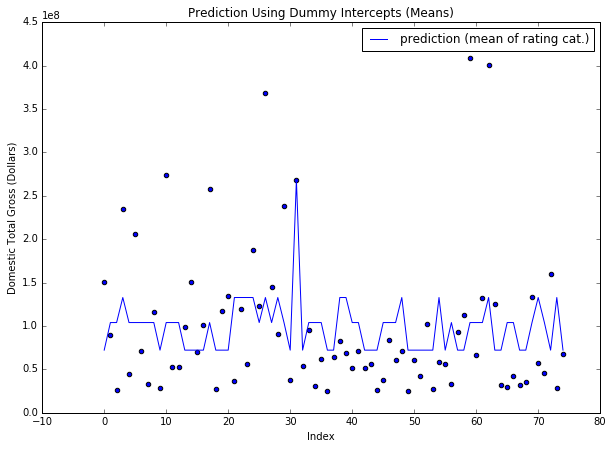

In [35]:
plt.figure(figsize=(10,7))
plt.plot(range(len(y_train)),model.predict(X_train[:,[1,2,3,4]]),label='prediction (mean of rating cat.)');
plt.scatter(range(len(y_train)),y_train);
plt.legend()
plt.title('Prediction Using Dummy Intercepts (Means)')
plt.ylabel('Domestic Total Gross (Dollars)');
plt.xlabel('Index');

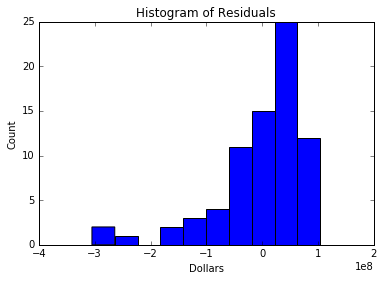

In [36]:
plt.hist(model.predict(X_train[:,[1,2,3,4]])-y_train);
plt.title('Histogram of Residuals')
plt.ylabel('Count');
plt.xlabel('Dollars');

In [37]:
sorted(zip(cats,model.coef_[0].tolist()),key=lambda x: x[1],reverse=True)

[('G', 268492764.0),
 ('PG', 132822647.07142858),
 ('PG-13', 103972408.86666667),
 ('R', 72194287.96666668)]

This model uses the mean of all the observations in an observation's rating category to predict Domestic Total Gross. According to this data, the more adult the content of a movie, the lower the Domestic Gross is. Kids love movies.

**Challenge 4**

In [38]:
model.fit(X_train,y_train);

In [39]:
model.coef_[0].tolist()

[0.7009285774623086,
 64604992.166931346,
 -21537149.008809604,
 -64766913.461926885,
 -55760530.93641676,
 890137.17768462]

Now, with the four dummies for rating and the runtime feature, the coefficient on budget has shrunk to .71. On the dummies, the model thinks that G rated movies are the highest grossing, followed by PG, then R, then finally PG-13. The model also thinks that for every minute of runtime a movie has, all else being held constant, it will gross 888029 more dollars.

**Challenge 5**

In [40]:
X_test[0,:]

array([46405148.81917403, 'R', 92], dtype=object)

In [41]:
dummies = np.zeros((X_test.shape[0],0))
for rat in ['G','PG','PG-13','R']:
    arr = np.zeros((X_test.shape[0],1))
    arr[X_test[:,1]==rat,0] = 1
    dummies = np.hstack((dummies,arr))

In [42]:
print dummies[0:3,:], X_test[0:3,1]

[[ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]] ['R' 'PG-13' 'R']


In [43]:
X_test = np.hstack((X_test[:,0][:,None],dummies,X_test[:,2][:,None])).astype(float)

In [44]:
model.score(X_test,y_test)

0.18563441641614964

This model scored a .18 R-Squared on the test set. Not bad!

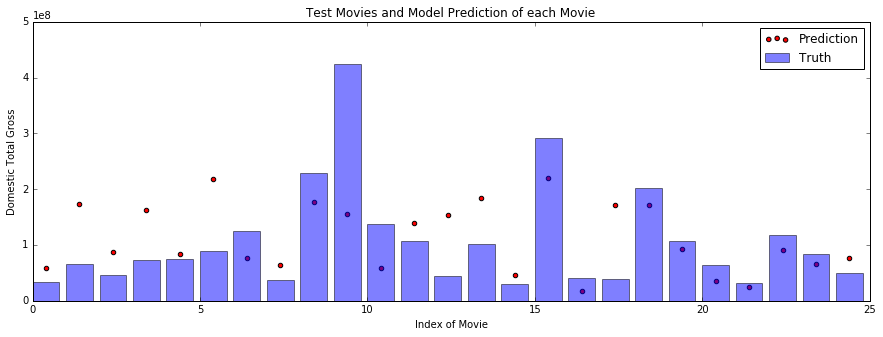

In [45]:
plt.figure(figsize=(15,5))
plt.bar(range(len(y_test)),y_test,alpha=.5,label='Truth');
plt.scatter(np.array(range(len(y_test)))+.4,model.predict(X_test),c='r',label='Prediction')
plt.ylim(ymin=0,ymax=5e8);
plt.xlim(xmin=0,xmax=25);
plt.legend();
plt.ylabel('Domestic Total Gross');
plt.xlabel('Index of Movie');
plt.title('Test Movies and Model Prediction of each Movie');